In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

c:\Users\ezubkoff.97LM7F3-\Desktop\dell-2-capstone\.venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\ezubkoff.97LM7F3-\Desktop\dell-2-capstone\.venv\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Users\ezubkoff.97LM7F3-\Desktop\dell-2-capstone\.venv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [7]:
data_dir = '../../assets/model_training2'
class_names = os.listdir(data_dir)

In [3]:
batch_size = 200
img_height = 180
img_width = 180

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=124,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=124,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 17494 files belonging to 10 classes.
Using 13996 files for training.
Found 17494 files belonging to 10 classes.
Using 3498 files for validation.


In [5]:
class_names = train_ds.class_names

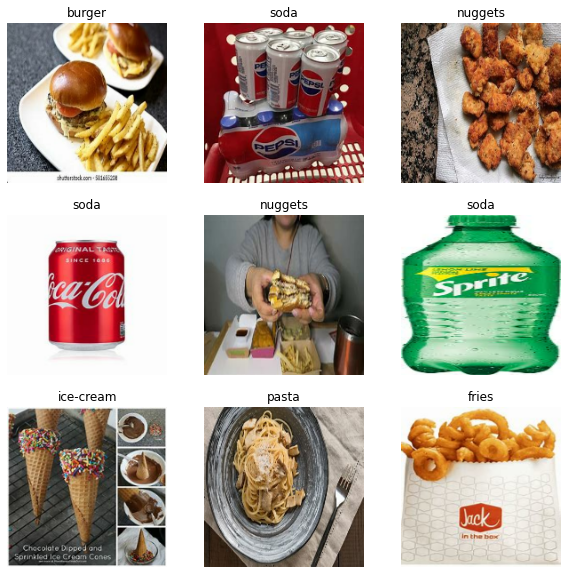

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
num_classes = 10

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [13]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [14]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', min_delta=.005, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True
)

In [16]:
history = model.fit(
  train_ds,
  callbacks=[early_stop],
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50
70/70 [==============================] - 17s 232ms/step - loss: 1.4875 - accuracy: 0.4670 - val_loss: 1.0928 - val_accuracy: 0.6321
Epoch 2/50
70/70 [==============================] - 9s 128ms/step - loss: 0.9432 - accuracy: 0.6771 - val_loss: 0.9376 - val_accuracy: 0.6810
Epoch 3/50
70/70 [==============================] - 7s 93ms/step - loss: 0.7635 - accuracy: 0.7441 - val_loss: 0.8518 - val_accuracy: 0.7170
Epoch 4/50
70/70 [==============================] - 7s 95ms/step - loss: 0.6332 - accuracy: 0.7940 - val_loss: 0.7972 - val_accuracy: 0.7439
Epoch 5/50
70/70 [==============================] - 6s 93ms/step - loss: 0.5427 - accuracy: 0.8199 - val_loss: 0.7544 - val_accuracy: 0.7627
Epoch 6/50
70/70 [==============================] - 6s 92ms/step - loss: 0.4240 - accuracy: 0.8655 - val_loss: 0.7697 - val_accuracy: 0.7679
Epoch 7/50
70/70 [==============================] - 6s 92ms/step - loss: 0.3325 - accuracy: 0.8965 - val_loss: 0.8090 - val_accuracy: 0.7679
Epoch 8/50

In [17]:


model2 = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [18]:
model2.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [19]:
early_stop2 = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', min_delta=.001, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True
)

In [21]:
history = model2.fit(
  train_ds,
  callbacks=[early_stop2],
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50
70/70 [==============================] - 7s 92ms/step - loss: 1.5308 - accuracy: 0.4546 - val_loss: 1.1750 - val_accuracy: 0.5921
Epoch 2/50
70/70 [==============================] - 6s 91ms/step - loss: 0.9935 - accuracy: 0.6631 - val_loss: 0.9165 - val_accuracy: 0.6804
Epoch 3/50
70/70 [==============================] - 6s 91ms/step - loss: 0.8076 - accuracy: 0.7251 - val_loss: 0.8277 - val_accuracy: 0.7130
Epoch 4/50
70/70 [==============================] - 6s 92ms/step - loss: 0.6813 - accuracy: 0.7711 - val_loss: 0.7742 - val_accuracy: 0.7393
Epoch 5/50
70/70 [==============================] - 6s 93ms/step - loss: 0.5791 - accuracy: 0.8100 - val_loss: 0.7389 - val_accuracy: 0.7550
Epoch 6/50
70/70 [==============================] - 6s 93ms/step - loss: 0.5018 - accuracy: 0.8366 - val_loss: 0.8026 - val_accuracy: 0.7421
Epoch 7/50
70/70 [==============================] - 6s 93ms/step - loss: 0.4099 - accuracy: 0.8681 - val_loss: 0.8643 - val_accuracy: 0.7278
Epoch 8/50
70

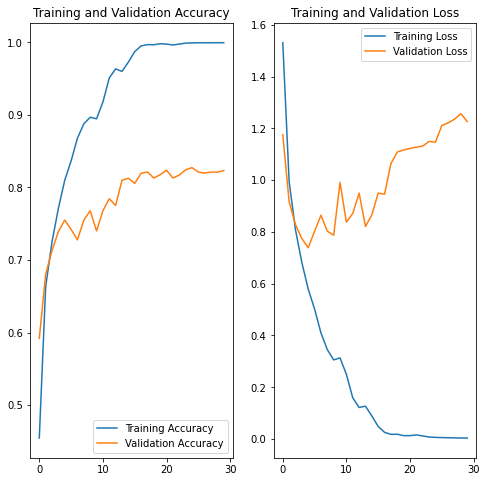

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
from sklearn.metrics import classification_report


In [58]:
preds1 = model.predict_classes(val_ds)
preds2 = model2.predict_classes(val_ds)
y = np.concatenate([y for x, y in val_ds], axis=0)


c:\Users\ezubkoff.97LM7F3-\Desktop\dell-2-capstone\.venv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [59]:
print(classification_report(y,preds1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       405
           1       0.00      0.00      0.00       410
           2       0.00      0.00      0.00       405
           3       0.16      0.02      0.04       401
           4       0.00      0.00      0.00       436
           5       0.00      0.00      0.00       281
           6       0.11      0.98      0.20       390
           8       0.00      0.00      0.00       374
           9       0.00      0.00      0.00       396

    accuracy                           0.11      3498
   macro avg       0.03      0.11      0.03      3498
weighted avg       0.03      0.11      0.03      3498

c:\Users\ezubkoff.97LM7F3-\Desktop\dell-2-capstone\.venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

In [60]:
print(classification_report(y,preds2))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       405
           1       0.80      0.81      0.81       410
           2       0.79      0.78      0.79       405
           3       0.76      0.75      0.75       401
           4       0.81      0.83      0.82       436
           5       0.74      0.70      0.72       281
           6       0.78      0.76      0.77       390
           8       0.89      0.89      0.89       374
           9       0.91      0.94      0.92       396

    accuracy                           0.83      3498
   macro avg       0.82      0.82      0.82      3498
weighted avg       0.83      0.83      0.83      3498



# Introducing Data Augmentation

In [3]:
from tensorflow.keras import layers


In [24]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [2]:
import tensorflow.keras.layers as layers
class RandomInvert(layers.Layer):
    def __init__(self, factor=0.5, **kwargs):
        super().__init__(**kwargs)
        self.factor = factor

    def call(self, x):
        return self.random_invert_img(x)

    def random_invert_img(self,x, p=0.5):
        if  tf.random.uniform([]) < p:
            x = (255-x)
        else:
            x
        return x

In [42]:
num_classes = 10

model3 = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  data_augmentation,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [43]:
model3.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [44]:
history3 = model3.fit(
  train_ds,
  #callbacks=[early_stop2],
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50
70/70 [==============================] - 8s 102ms/step - loss: 1.6788 - accuracy: 0.3865 - val_loss: 1.2710 - val_accuracy: 0.5400
Epoch 2/50
70/70 [==============================] - 7s 101ms/step - loss: 1.1840 - accuracy: 0.5863 - val_loss: 1.1101 - val_accuracy: 0.5949
Epoch 3/50
70/70 [==============================] - 7s 102ms/step - loss: 1.0582 - accuracy: 0.6332 - val_loss: 1.0190 - val_accuracy: 0.6341
Epoch 4/50
70/70 [==============================] - 7s 102ms/step - loss: 0.9861 - accuracy: 0.6555 - val_loss: 0.9795 - val_accuracy: 0.6501
Epoch 5/50
70/70 [==============================] - 7s 102ms/step - loss: 0.9455 - accuracy: 0.6689 - val_loss: 0.9672 - val_accuracy: 0.6552
Epoch 6/50
70/70 [==============================] - 7s 102ms/step - loss: 0.9006 - accuracy: 0.6824 - val_loss: 0.9259 - val_accuracy: 0.6761
Epoch 7/50
70/70 [==============================] - 7s 103ms/step - loss: 0.8598 - accuracy: 0.6977 - val_loss: 0.8942 - val_accuracy: 0.6921
Epoch 

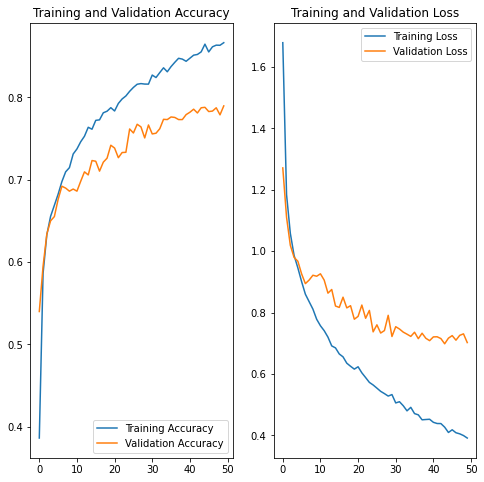

In [45]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [49]:
early_stop4 = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', min_delta=.001, patience=,20 verbose=0,
    mode='auto', baseline=None, restore_best_weights=True
)

history4 = model3.fit(
  train_ds,
  #callbacks=[early_stop4],
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50
70/70 [==============================] - 7s 103ms/step - loss: 0.2277 - accuracy: 0.9197 - val_loss: 0.7918 - val_accuracy: 0.8130
Epoch 2/50
70/70 [==============================] - 7s 102ms/step - loss: 0.2189 - accuracy: 0.9234 - val_loss: 0.7623 - val_accuracy: 0.8153
Epoch 3/50
70/70 [==============================] - 7s 102ms/step - loss: 0.2245 - accuracy: 0.9213 - val_loss: 0.7699 - val_accuracy: 0.8208
Epoch 4/50
70/70 [==============================] - 7s 102ms/step - loss: 0.2168 - accuracy: 0.9243 - val_loss: 0.7611 - val_accuracy: 0.8107
Epoch 5/50
70/70 [==============================] - 7s 103ms/step - loss: 0.2188 - accuracy: 0.9215 - val_loss: 0.7661 - val_accuracy: 0.8125
Epoch 6/50
70/70 [==============================] - 7s 104ms/step - loss: 0.2224 - accuracy: 0.9245 - val_loss: 0.8102 - val_accuracy: 0.8022
Epoch 7/50
70/70 [==============================] - 7s 103ms/step - loss: 0.2176 - accuracy: 0.9225 - val_loss: 0.8158 - val_accuracy: 0.8039
Epoch 

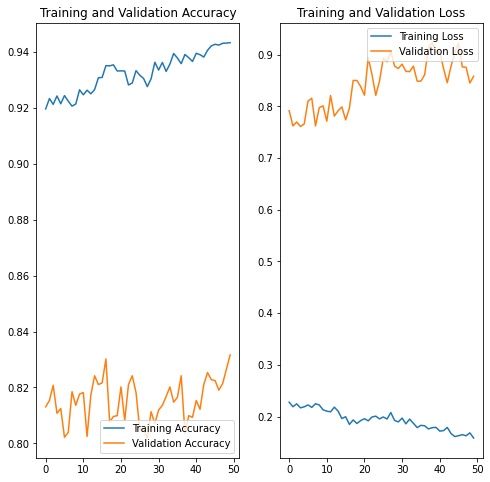

In [50]:
h = history4
acc = h.history['accuracy']
val_acc = h.history['val_accuracy']

loss = h.history['loss']
val_loss = h.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [55]:
num_classes = 10

model5 = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  data_augmentation,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(.01),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

early_stop5 = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', min_delta=.001, patience=20, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True
)
model5.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history5 = model5.fit(
  train_ds,
  callbacks=[early_stop5],
  validation_data=val_ds,
  epochs=400)

Epoch 1/400
70/70 [==============================] - 8s 103ms/step - loss: 1.7093 - accuracy: 0.3752 - val_loss: 1.3959 - val_accuracy: 0.5031
Epoch 2/400
70/70 [==============================] - 7s 101ms/step - loss: 1.2071 - accuracy: 0.5713 - val_loss: 1.1954 - val_accuracy: 0.5792
Epoch 3/400
70/70 [==============================] - 7s 101ms/step - loss: 1.0618 - accuracy: 0.6313 - val_loss: 1.0736 - val_accuracy: 0.6215
Epoch 4/400
70/70 [==============================] - 7s 101ms/step - loss: 0.9819 - accuracy: 0.6576 - val_loss: 0.9765 - val_accuracy: 0.6584
Epoch 5/400
70/70 [==============================] - 7s 101ms/step - loss: 0.9240 - accuracy: 0.6784 - val_loss: 0.9532 - val_accuracy: 0.6675
Epoch 6/400
70/70 [==============================] - 7s 101ms/step - loss: 0.8778 - accuracy: 0.6964 - val_loss: 0.9032 - val_accuracy: 0.6987
Epoch 7/400
70/70 [==============================] - 7s 101ms/step - loss: 0.8461 - accuracy: 0.7047 - val_loss: 0.8941 - val_accuracy: 0.6910

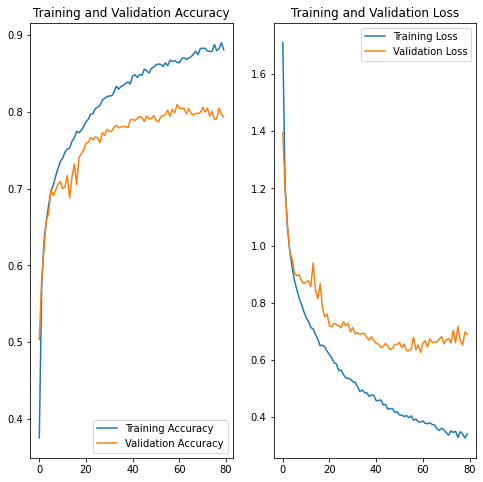

In [57]:
h = history5
acc = h.history['accuracy']
val_acc = h.history['val_accuracy']

loss = h.history['loss']
val_loss = h.history['val_loss']

epochs_range = range(80)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [61]:

preds5 = model5.predict_classes(val_ds)
print(classification_report(y,preds5))

c:\Users\ezubkoff.97LM7F3-\Desktop\dell-2-capstone\.venv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
              precision    recall  f1-score   support

           0       0.96      0.89      0.93       405
           1       0.77      0.83      0.80       410
           2       0.79      0.79      0.79       405
           3       0.73      0.64      0.68       401
           4       0.76      0.82      0.79       436
           5       0.70      0.70      0.70       281
           6       0.76      0.71  

In [65]:
print(classification_report(y,preds2))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       405
           1       0.80      0.81      0.81       410
           2       0.79      0.78      0.79       405
           3       0.76      0.75      0.75       401
           4       0.81      0.83      0.82       436
           5       0.74      0.70      0.72       281
           6       0.78      0.76      0.77       390
           8       0.89      0.89      0.89       374
           9       0.91      0.94      0.92       396

    accuracy                           0.83      3498
   macro avg       0.82      0.82      0.82      3498
weighted avg       0.83      0.83      0.83      3498



In [66]:
model6 = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  data_augmentation,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(.01),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model6.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history6 = model6.fit(
  train_ds,
  validation_data=val_ds,
  epochs=200)

124 - val_accuracy: 0.7847
Epoch 63/200
70/70 [==============================] - 8s 111ms/step - loss: 0.3479 - accuracy: 0.8797 - val_loss: 0.7392 - val_accuracy: 0.7902
Epoch 64/200
70/70 [==============================] - 8s 111ms/step - loss: 0.3462 - accuracy: 0.8802 - val_loss: 0.7777 - val_accuracy: 0.7713
Epoch 65/200
70/70 [==============================] - 8s 112ms/step - loss: 0.3494 - accuracy: 0.8773 - val_loss: 0.7451 - val_accuracy: 0.7816
Epoch 66/200
70/70 [==============================] - 8s 112ms/step - loss: 0.3518 - accuracy: 0.8803 - val_loss: 0.7188 - val_accuracy: 0.7902
Epoch 67/200
70/70 [==============================] - 8s 112ms/step - loss: 0.3348 - accuracy: 0.8844 - val_loss: 0.7522 - val_accuracy: 0.7847
Epoch 68/200
70/70 [==============================] - 8s 112ms/step - loss: 0.3539 - accuracy: 0.8793 - val_loss: 0.7441 - val_accuracy: 0.7844
Epoch 69/200
70/70 [==============================] - 8s 112ms/step - loss: 0.3455 - accuracy: 0.8793 - val_l

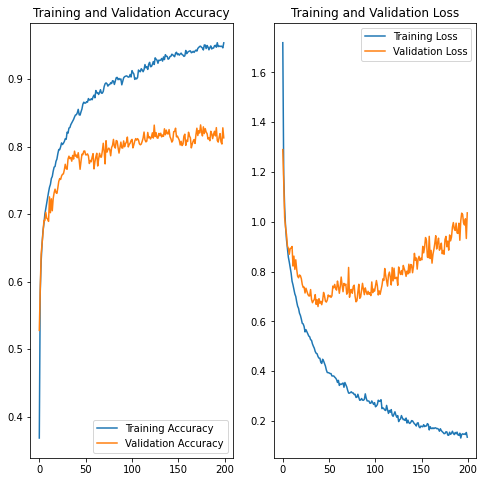

In [68]:
h = history6
acc = h.history['accuracy']
val_acc = h.history['val_accuracy']

loss = h.history['loss']
val_loss = h.history['val_loss']

epochs_range = range(200)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [69]:
model2.save('assets/ten_class_classifier_without_augmentation.h5')
model5.save('assets/ten_class_classifier_with_augmentation.h5')

In [70]:
print(classification_report(y,preds2))
print(classification_report(y,preds5))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       405
           1       0.80      0.81      0.81       410
           2       0.79      0.78      0.79       405
           3       0.76      0.75      0.75       401
           4       0.81      0.83      0.82       436
           5       0.74      0.70      0.72       281
           6       0.78      0.76      0.77       390
           8       0.89      0.89      0.89       374
           9       0.91      0.94      0.92       396

    accuracy                           0.83      3498
   macro avg       0.82      0.82      0.82      3498
weighted avg       0.83      0.83      0.83      3498

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       405
           1       0.77      0.83      0.80       410
           2       0.79      0.79      0.79       405
           3       0.73      0.64      0.68       401
           4       0.76 

In [13]:
class GrayScale(layers.Layer):
    def __init__(self,  **kwargs):
        super().__init__(**kwargs)
        

    def call(self, x):
        return self.gray_scale(x)

    def gray_scale(self,x):
        return tf.image.rgb_to_grayscale(x)

In [78]:
model7 = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  data_augmentation,
  GrayScale(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(.01),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model7.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history7 = model7.fit(
  train_ds,
  validation_data=val_ds,
  epochs=200)

105 - val_accuracy: 0.6349
Epoch 63/200
70/70 [==============================] - 9s 124ms/step - loss: 0.7850 - accuracy: 0.7305 - val_loss: 1.1184 - val_accuracy: 0.6266
Epoch 64/200
70/70 [==============================] - 9s 124ms/step - loss: 0.7718 - accuracy: 0.7331 - val_loss: 1.0807 - val_accuracy: 0.6444
Epoch 65/200
70/70 [==============================] - 9s 124ms/step - loss: 0.7676 - accuracy: 0.7386 - val_loss: 1.1302 - val_accuracy: 0.6261
Epoch 66/200
70/70 [==============================] - 9s 124ms/step - loss: 0.7790 - accuracy: 0.7342 - val_loss: 1.0889 - val_accuracy: 0.6344
Epoch 67/200
70/70 [==============================] - 9s 124ms/step - loss: 0.7630 - accuracy: 0.7418 - val_loss: 1.0955 - val_accuracy: 0.6409
Epoch 68/200
70/70 [==============================] - 9s 124ms/step - loss: 0.7658 - accuracy: 0.7397 - val_loss: 1.0891 - val_accuracy: 0.6404
Epoch 69/200
70/70 [==============================] - 9s 124ms/step - loss: 0.7542 - accuracy: 0.7435 - val_l

In [73]:
import tensorflow as tf

In [74]:
tf.image

<module 'tensorflow._api.v2.image' from 'c:\\Users\\ezubkoff.97LM7F3-\\Desktop\\dell-2-capstone\\.venv\\lib\\site-packages\\tensorflow\\_api\\v2\\image\\__init__.py'>

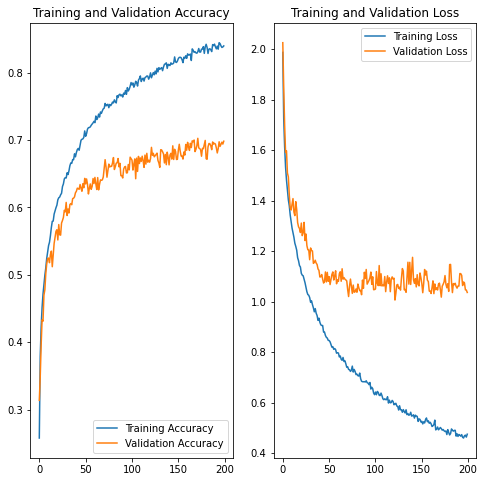

In [79]:
h = history7
acc = h.history['accuracy']
val_acc = h.history['val_accuracy']

loss = h.history['loss']
val_loss = h.history['val_loss']

epochs_range = range(200)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
import tensorflow as tf
from tensorflow import keras
model_without_aug = keras.models.load_model('assets/ten_class_classifier_with_augmentation.h5')

In [38]:
import numpy as np
model_with_aug= model_without_aug

In [9]:
classes = ['apple',
 'burger',
 'cookie',
 'fries',
 'ice-cream',
 'nuggets',
 'pasta',
 'pizza',
 'salad',
 'soda']

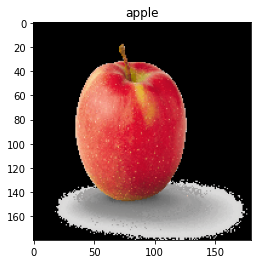

In [40]:
img = tf.keras.preprocessing.image.load_img('../../assets/model_testing/sample_apple.png', target_size=(180, 180))
img = np.asarray(img).reshape(-1, 180, 180, 3)

plt.title(classes[model_with_aug.predict_classes(img)[0]])
plt.imshow(img[0]);



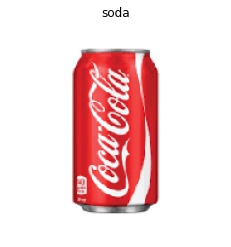

In [43]:
img = tf.keras.preprocessing.image.load_img('../../assets/model_testing/sample_soda.png', target_size=(180, 180))
img = np.asarray(img).reshape(-1, 180, 180, 3)

plt.title(classes[model_with_aug.predict_classes(img)[0]])
plt.imshow(img[0]);

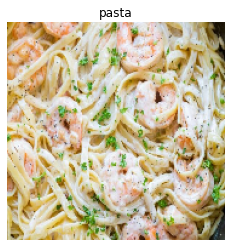

In [47]:
img = tf.keras.preprocessing.image.load_img('../../assets/model_testing/sample_pasta.jpg', target_size=(180, 180))
img = np.asarray(img).reshape(-1, 180, 180, 3)

plt.title(classes[model_with_aug.predict_classes(img)[0]])
plt.imshow(img[0]);
plt.axis('off');

In [15]:
img = tf.keras.preprocessing.image.load_img('../../assets/model_testing/sample_burger.jpg', target_size=(180, 180))
img = np.asarray(img).reshape(-1, 180, 180, 3)
print(classes[model_without_aug.predict_classes(img)[0]])

burger


In [16]:
img = tf.keras.preprocessing.image.load_img('../../assets/model_testing/sample_ice_cream.jpg', target_size=(180, 180))
img = np.asarray(img).reshape(-1, 180, 180, 3)
print(classes[model_without_aug.predict_classes(img)[0]])

ice-cream


In [18]:
img = tf.keras.preprocessing.image.load_img('../../assets/model_testing/sample_salad.jpg', target_size=(180, 180))
img = np.asarray(img).reshape(-1, 180, 180, 3)
print(classes[model_without_aug.predict_classes(img)[0]])

salad


In [9]:
img = tf.keras.preprocessing.image.load_img('../../assets/model_testing/bgf.jpg', target_size=(180, 180))
img = np.asarray(img).reshape(-1, 180, 180, 3)
print(classes[model_without_aug.predict_classes(img)[0]])
for idx, weight in enumerate(model_without_aug.predict(img)[0]):
    print(classes[idx], weight)

fries
apple -6.16562
burger 6.221352
cookie 1.8220764
fries 8.202291
ice-cream -2.1909788
nuggets 2.8423984
pasta 8.117644
pizza -13.61504
salad 3.607567
soda -7.3881197


In [8]:
images = [x for x, y in train_ds.take(1)]
import matplotlib.pyplot as plt


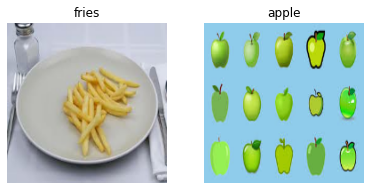

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(2):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

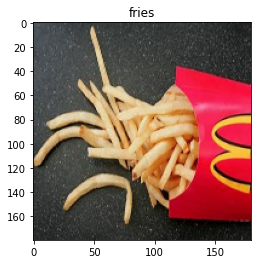

In [11]:
import matplotlib.pyplot as plt
img = ''
label = ''
for x,y in train_ds.take(1):
    img=x[15].numpy().astype("uint8")
    label=classes[y[15]]
    break
plt.title(label)
plt.imshow(img)

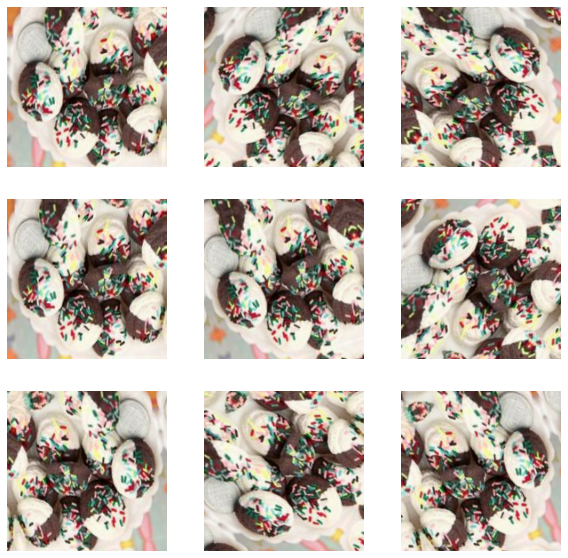

In [27]:
image = tf.expand_dims(img, 0)
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

TypeError: Image data of dtype object cannot be converted to float

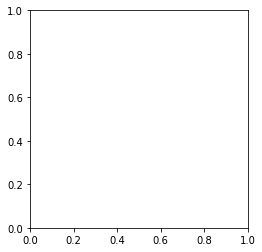

Text(0.5, 1.0, 'invert')

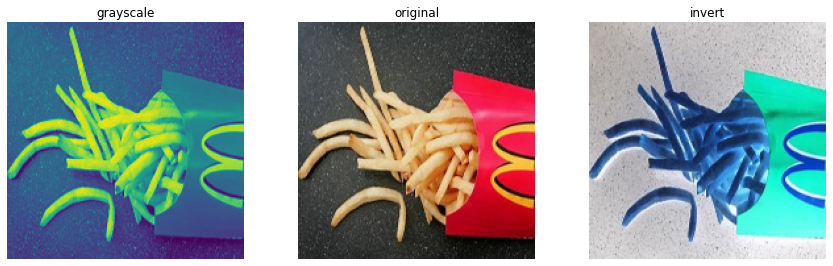

In [34]:

r =  RandomInvert()



plt.figure(figsize=(20,20))
plt.imshow(img)
plt.subplot(4,4,1)
plt.imshow(tf.image.rgb_to_grayscale(img))
plt.title('grayscale')
plt.axis('off')
plt.subplot(4,4,2)
plt.imshow(img)
plt.title('original')
plt.axis('off')
plt.subplot(4,4,3)
plt.imshow(r.call(x=img))
plt.axis('off')
plt.title('invert')